In [5]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
from datetime import datetime

In [10]:
df = pd.read_csv('../data/try.csv')

In [7]:
# df['onMarket'].mean()

In [11]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'user', 'district',
       'width', 'length', 'advertiser_type', 'create_time', 'review',
       'profileImg', 'UserName', 'iam_verified', 'rega_id', 'DayOfRent',
       'timeBeforeRent'],
      dtype='object')

In [12]:
df['timeBeforeRent'].value_counts()

0      3351
21      242
22      208
23      150
24      142
       ... 
336       1
169       1
380       1
254       1
196       1
Name: timeBeforeRent, Length: 176, dtype: int64

In [13]:
df["onMarket"] = 0

In [14]:
for index , row in df.iterrows():
    if(row['timeBeforeRent'] == 0 ):
        td = int(((datetime.now() ) - (pd.to_datetime( row['create_time'][2:12] , format='%Y-%m-%d')))/np.timedelta64(1, 'D'))
        # # td = int(td )
        df['onMarket'][index] = td
    else:
        df['onMarket'][index] = df['timeBeforeRent'][index]

/tmp/ipykernel_13641/3402429901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = td
/tmp/ipykernel_13641/3402429901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = df['timeBeforeRent'][index]


<AxesSubplot:ylabel='Frequency'>

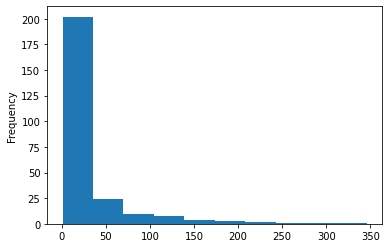

In [15]:
df['onMarket'].value_counts().plot(kind = 'hist')

In [16]:
df['onMarket'].mean()

57.027664531159

In [17]:
df.to_csv('../data/try.csv')